In [28]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import requests
import json
import schedule
import time
import datetime
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from twython import Twython

In [29]:
# Authentication
consumer_Key = 'chie8F9xbOWpMDOxJTolC89yy'
consumer_Secret = 'WUQwRqXd7niAkOEBzZ5iOH76c4NCS6UunTNJ4IUSFuWempLcBQ'
access_Token = '1356292685385105408-yP2gaDQkkHMSSa2hUcjfwSKueKen8v'
access_Token_Secret = 'UlBapYsreywE4CyYARnEJmqDXlV5KrhXhgvWMmQGIoq3E'

auth = tweepy.OAuthHandler(consumer_Key, consumer_Secret)
auth.set_access_token(access_Token, access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
## Define a function to calculate the percentage ##
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [30]:
# Define the search term and the date_since date as variables
search_words = "(online school) OR (online learning) OR (distance learning) OR (online classes) OR (online class) OR (remote learning) OR (blended learning) OR (elearning) OR (online class during covid) OR (zoom class) OR (zoom classes)"
date_since = "2020-02-01"
new_search = search_words + " -filter:retweets"
noOfTweet = 5000

tweets = tweepy.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(noOfTweet)

users_locs = [[tweet.user.screen_name, tweet.text, tweet.user.location, tweet.created_at] for tweet in tweets]
# users_locs

KeyboardInterrupt: 

In [4]:
# Define the search term and the date_since date as variables

search_words = "(online school) OR (online learning) OR (distance learning) OR (online classes) OR (online class) OR (remote learning) OR (blended learning) OR (elearning) OR (online class during covid) OR (zoom class) OR (zoom classes)"
date_since = "2020-02-01"
new_search = search_words + " -filter:retweets"
noOfTweet = 5000

# Create variables to hold the average polarity #
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

tweets = tweepy.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(noOfTweet)

for tweet in tweets:
    
    tweet_list.extend([[tweet.user.screen_name, tweet.text, tweet.user.location, tweet.created_at]])
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
        neutral += 1
        
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1

    elif(analysis.sentiment.polarity > 0.00):
        positive += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral  = percentage(neutral, noOfTweet)
polarity  = percentage(polarity, noOfTweet)

# Limit the decimal upto 2 places #
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5000
positive number:  0
negative number:  0
neutral number:  0


In [7]:
## Print the result ##

print("How people are reacting on " + new_search + 
      " By analyzing " + str(noOfTweet) + " Tweets ")

if (polarity == 0):
    print("Neutral")
    
elif (polarity < 0.00):
    print("Negative")
    
elif (polarity > 0.00):
    print("Positive")

How people are reacting on (online school) OR (online learning) OR (distance learning) OR (online classes) OR (online class) OR (remote learning) OR (blended learning) OR (elearning) OR (online class during covid) OR (zoom class) OR (zoom classes) -filter:retweets By analyzing 5000 Tweets 
Positive


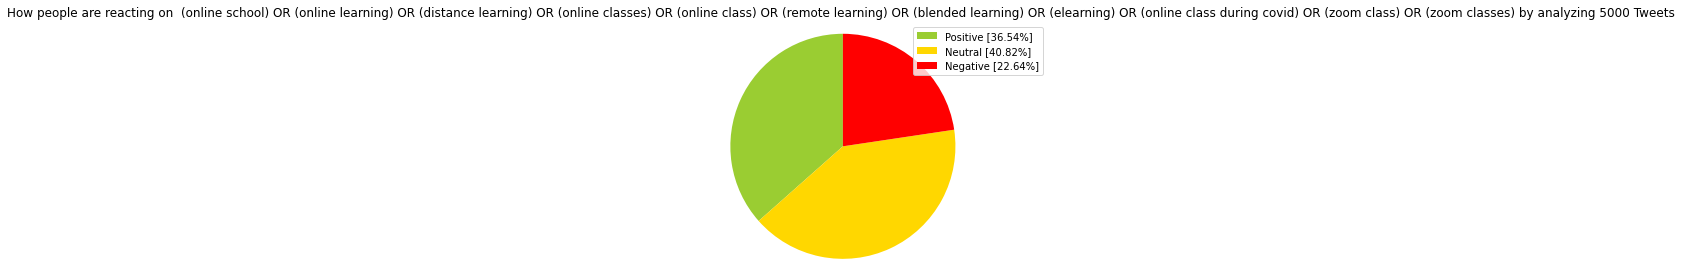

In [10]:
## Print the Pie Chart ##
    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('How people are reacting on  '
          +search_words+' by analyzing '
          +str(noOfTweet)+' Tweets ')
plt.axis('equal')
plt.tight_layout()
plt.show()

Drop duplicates

In [13]:
tweet_list.drop_duplicates(inplace = True)

In [23]:
tweet_list.describe

<bound method NDFrame.describe of                                                       0
0     @KhattakMj Aisay lag raha zoom py class ho rah...
1     Hire LEGIT academic help in;\n#MATH CLASS\n#Th...
2     Pay someone to write your;\nAssignments\nOnlin...
3     Once upon a time, in a pre-covid world not far...
4     Online classes are useless . It doesn't only e...
...                                                 ...
4995  I request the government officials to close th...
4996  In my weekly newsletter today I am reflecting ...
4997                   @GhemmdyB true fuck online class
4998  Praise the Lord! Beloved, trust you are doing ...
4999  What's new about this morning ? \nNew lockdown...

[4956 rows x 1 columns]>

In [26]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(data=tweet_list, 
                    columns=['user', 'tweet','location', 'created at'])
# tw_list[“text”] = tw_list[0]
#Removing RT, Punctuation etc
# remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
# tw_list["tweet"] = tw_list.tweet.map(remove_rt).map(rt)
# tw_list["tweet"] = tw_list.tweet.str.lower()
tw_list

,user,tweet,location,created at
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4995,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[[‘polarity’, ‘subjectivity’]] = tw_list[‘text’].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list[‘text’].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score[‘neg’]
 neu = score[‘neu’]
 pos = score[‘pos’]
 comp = score[‘compound’]
 if neg > pos:
 tw_list.loc[index, ‘sentiment’] = “negative”
 elif pos > neg:
 tw_list.loc[index, ‘sentiment’] = “positive”
 else:
 tw_list.loc[index, ‘sentiment’] = “neutral”
 tw_list.loc[index, ‘neg’] = neg
 tw_list.loc[index, ‘neu’] = neu
 tw_list.loc[index, ‘pos’] = pos
 tw_list.loc[index, ‘compound’] = comp
tw_list.head(10)

In [10]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "tweet","location", "created at"])
tweet_text

,user,tweet,location,created at
0,angeI4pf,@swam1k i’m not failing but online school is s...,he/him,2021-03-21 16:25:33
1,allforclyden,online class is a hell loop &amp; no one can c...,aji follows,2021-03-21 16:25:27
2,spicybutcalm,can’t wait to get the jab so i can be late to ...,,2021-03-21 16:25:13
3,PriceofFreedom7,And that concludes Aria of Sorrow once again \...,Midgar outskirts,2021-03-21 16:25:11
4,KellyMi17125122,@mariebih23 I offer writing services in essays...,,2021-03-21 16:24:59
...,...,...,...,...
4464,SamAbhi10,@DrRPNishank sir.our parents are not sending f...,,2021-03-21 06:47:43
4465,spn__weirdo,@P3tty0dd Oh yeah I tried to get that but my m...,18: any pronouns:♌️,2021-03-21 06:47:39
4466,ELMIT,Did you lose your job? Are you interested in l...,Taipei,2021-03-21 06:47:27
4467,SamAbhi10,@DrRPNishank sir.our parents are not sending f...,,2021-03-21 06:47:25


In [11]:
tweet_text.describe()

<ipython-input-11-44d7009a5a3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_text.describe()


,user,tweet,location,created at
count,4469,4469,4469,4469
unique,3171,4427,1670,4084
top,onlinewriters_1,Timely and Quality assured;\n#RESEARCH PAPER\n...,,2021-03-21 13:00:00
freq,61,4,1163,6
first,NaN,NaN,NaN,2021-03-21 06:46:44
last,NaN,NaN,NaN,2021-03-21 16:25:33


In [12]:
print(tweet_text[tweet_text['location'].str.contains('UAE')])
print(tweet_text[tweet_text['location'].str.contains('United Arab Emirates')])
print(tweet_text[tweet_text['location'].str.contains('Dubai')])
# print(tweet_text[tweet_text['location'].str.contains('Dubayy')])
# print(tweet_text[tweet_text['location'].str.contains('Sharjah')])

              user                                              tweet  \
1461  iamdonylewiz                Huling online class na this week 🥺🥺   
2515    nehabali_1  HAND N HAND- AN online club for 60+\nWe have a...   

        location          created at  
1461         UAE 2021-03-21 13:52:21  
2515  Dubai, UAE 2021-03-21 11:45:05  
                 user                                              tweet  \
1596           iHenlo  me about to start presenting my capstone part:...   
1799        unk0wn103  cancel exams make it fair!! we aren’t prepared...   
1978  kanakbhagatoff1  Online classes are like dora the explorer to m...   
2125        unk0wn103  Be fair to other countries we have had online ...   
2136    L_Farquhar_IB  A year after the start of our online learning ...   
2164        unk0wn103  cancel exams in the UAE!local exams have alrea...   
3607            Meirc  Certificate in Professional Arabic Writing Ski...   
4096      MrAndiPrice  Just love using @PhETsims FREE (

In [13]:
print('Number of unique summaries:', len(tweet_text['tweet'].unique()))

Number of unique summaries: 4427


#### Check for null/empty values 

In [14]:
tweet_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user        4469 non-null   object        
 1   tweet       4469 non-null   object        
 2   location    4469 non-null   object        
 3   created at  4469 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 139.8+ KB


In [16]:
nulls = tweet_text.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

We have no empty data

# B: Data Labelling

Dividing into pos, neg, neutral for polarity

In [17]:
# Create variables to hold the average polarity #
positive = 0
negative = 0
neutral = 0
polarity = 0

In [32]:
new_tweet_list = []
for tweet in tweets:
    # users_locs = [[tweet.user.screen_name, tweet.text, tweet.user.location, tweet.created_at] for tweet in tweets]
    new_tweet_list.extend([tweet.user.screen_name, tweet.text, tweet.user.location, tweet.created_at])
    analysis = TextBlob(tweet.text) 
    polarity += analysis.sentiment.polarity
   
    if(analysis.sentiment.polarity == 0):
        neutral += 1
       
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1

    elif(analysis.sentiment.polarity > 0.00):
        positive += 1


In [22]:
## Define a function to calculate the percentage ##
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [23]:
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral  = percentage(neutral, noOfTweet)
polarity  = percentage(polarity, noOfTweet)

In [24]:
# Limit the decimal upto 2 places #
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [26]:
## Print the result ##

print("How people are reacting on " + new_search + 
      " By analyzing " + str(noOfTweet) + " Tweets ")

if (polarity == 0):
    print("Neutral")
    
elif (polarity < 0.00):
    print("Negative")
    
elif (polarity > 0.00):
    print("Positive")

How people are reacting on (online school) OR (online learning) OR (distance learning) OR (online classes) OR (online class) OR (remote learning) OR (blended learning) OR (elearning) OR (online class during covid) OR (zoom class) OR (zoom classes) -filter:retweets By analyzing 5000 Tweets 
Neutral


In [28]:
## Print the Pie Chart ##
    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('How people are reacting on  '
          +searchTerm+' by analyzing '
          +str(NoOfTerms)+' Tweets ')
plt.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'searchTerm' is not defined

After clearning:

Top 20 most unique words used from the dataset 

    Word  Frequency
  online       1456
      to       1397
     the        989
     and        936
     for        792
       a        644
      in        626
      of        606
      is        596
       I        592
 classes        492
    your        450
      my        445
     you        444
   class        425
     are        374
  school        371
    with        339
    help        335
    have        307




<AxesSubplot:title={'center':'Top 20 most unique words used from the dataset'}, ylabel='Frequency'>

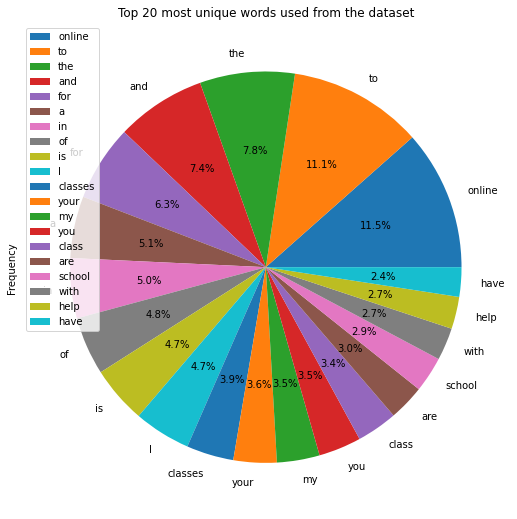

In [10]:
from collections import Counter
no_top_unique_words = "20" #@param {type:"string"}

# df = pd.read_csv('sample_data.tsv',sep="\t")

result = Counter(" ".join(tweet_text['tweet'].values.tolist()).split(" ")).items()
df = pd.DataFrame(result)
df.columns =['Word', 'Frequency']
df = df[df.Word != ""] #Deletes the empty spaces counted
df = df.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
unique_df = df.head(int(no_top_unique_words))
unique_df.plot(y='Frequency', kind='pie', labels=unique_df['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')